In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df=pd.read_csv('mitbih_train.csv', header = None)
df.head()
df.shape


(87554, 188)

In [3]:
df['condition']=df[187].replace({0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'})

In [4]:
df['condition']

0        N
1        N
2        N
3        N
4        N
        ..
87549    Q
87550    Q
87551    Q
87552    Q
87553    Q
Name: condition, Length: 87554, dtype: object

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,condition
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q


In [6]:
df.shape

(87554, 189)

In [7]:
df.isna().values.sum()

0

In [8]:
df.isnull().values.sum()

0

In [9]:
df['condition'].value_counts()

N    72471
Q     6431
V     5788
S     2223
F      641
Name: condition, dtype: int64

We can see that there are a large number of data points for the 'N' condition in comparison to all other conditions.

In [10]:
df_agg=df.drop("condition",axis='columns').aggregate([np.std,'mean'],axis=0,numeric_only=True)

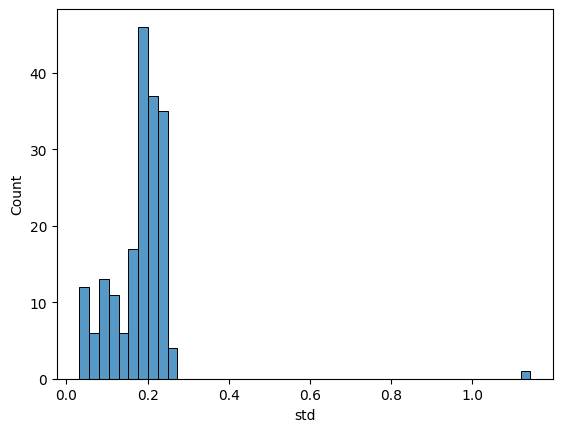

In [11]:
sns.histplot(data=df_agg.iloc[0,:])
plt.savefig('std.jpeg')

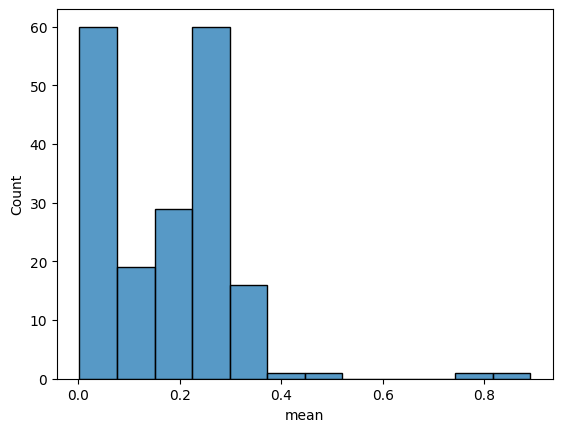

In [12]:
sns.histplot(data=df_agg.iloc[1,:])
plt.savefig('mean.jpeg')

Most of the data has a standard deviation in the range 0.05-0.026. We have excluded the last column as it contains labels not data points. The data is not noisy.

Most of the data has a mean in the range 0-0.35. Rest of the data has a mean in the range 0.7-0.85.

In [13]:
df.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
       ...
               179,         180,         181,         182,         183,
               184,         185,         186,         187, 'condition'],
      dtype='object', length=189)

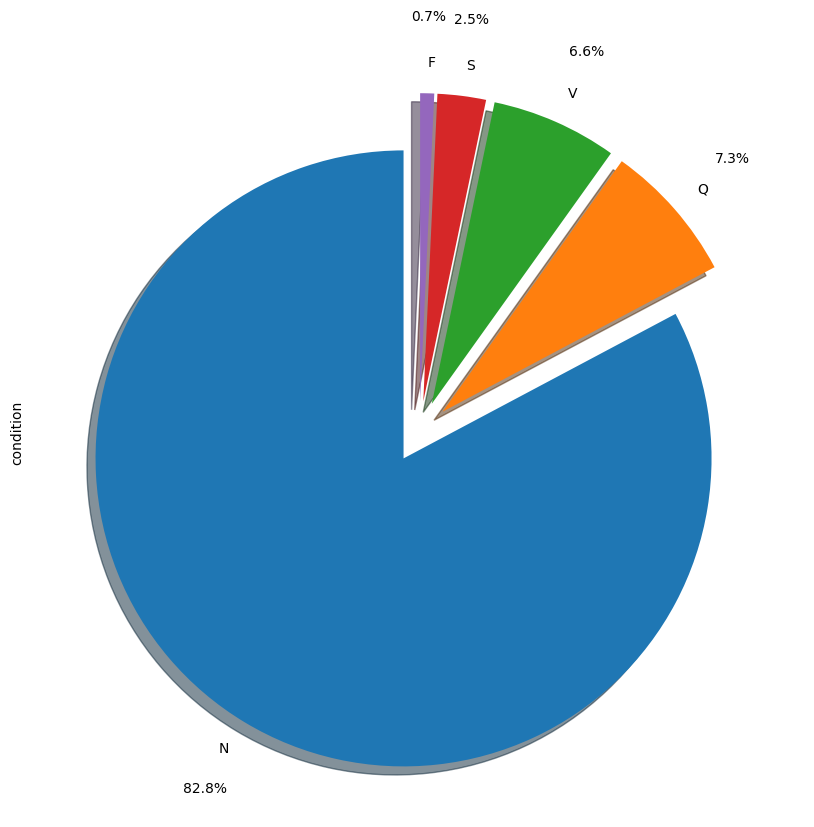

In [14]:
plt.figure(figsize=(20,10))
explode = ( 0.1, 0.1, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
df.condition\
.value_counts().plot(kind='pie',explode=explode,subplots=True,autopct='%1.1f%%', pctdistance= 1.25,shadow=True, startangle=90)
plt.savefig('pie.jpeg')


In [47]:
mean=df.drop(columns=[187]).mean(axis=1,numeric_only=True)
std=df.drop(columns=[187]).std(axis=1,numeric_only=True)
condition=df['condition'].values
mean_std_df=pd.DataFrame({'mean':mean,'std':std,'condition':condition})
mean_std_df

,mean,std,condition
0,0.098419,0.176545,N
1,0.090010,0.160151,N
2,0.062104,0.139142,N
3,0.084084,0.161252,N
4,0.116567,0.186651,N
...,...,...,...
87549,0.158364,0.169925,Q
87550,0.325508,0.293708,Q
87551,0.316665,0.275855,Q
87552,0.101807,0.161769,Q


<AxesSubplot: xlabel='condition', ylabel='mean'>

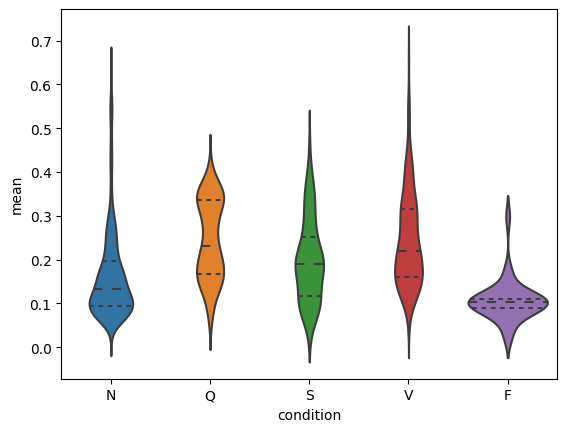

In [49]:
sns.violinplot(data=data,x='condition',y="mean"
,inner='quartile')

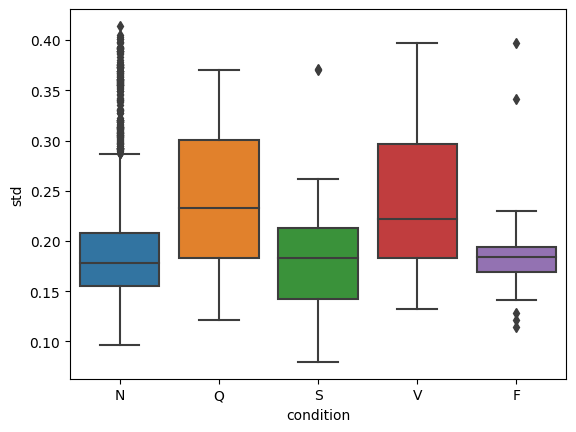

In [46]:
sns.boxplot(data=data,x='condition',y="std")
plt.savefig('std_boxplot.jpeg')

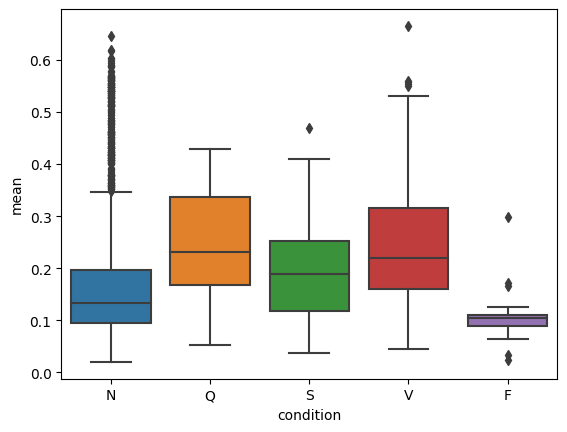

In [45]:
sns.boxplot(data=data,x='condition',y="mean")
plt.savefig('mean_boxplot.jpeg')

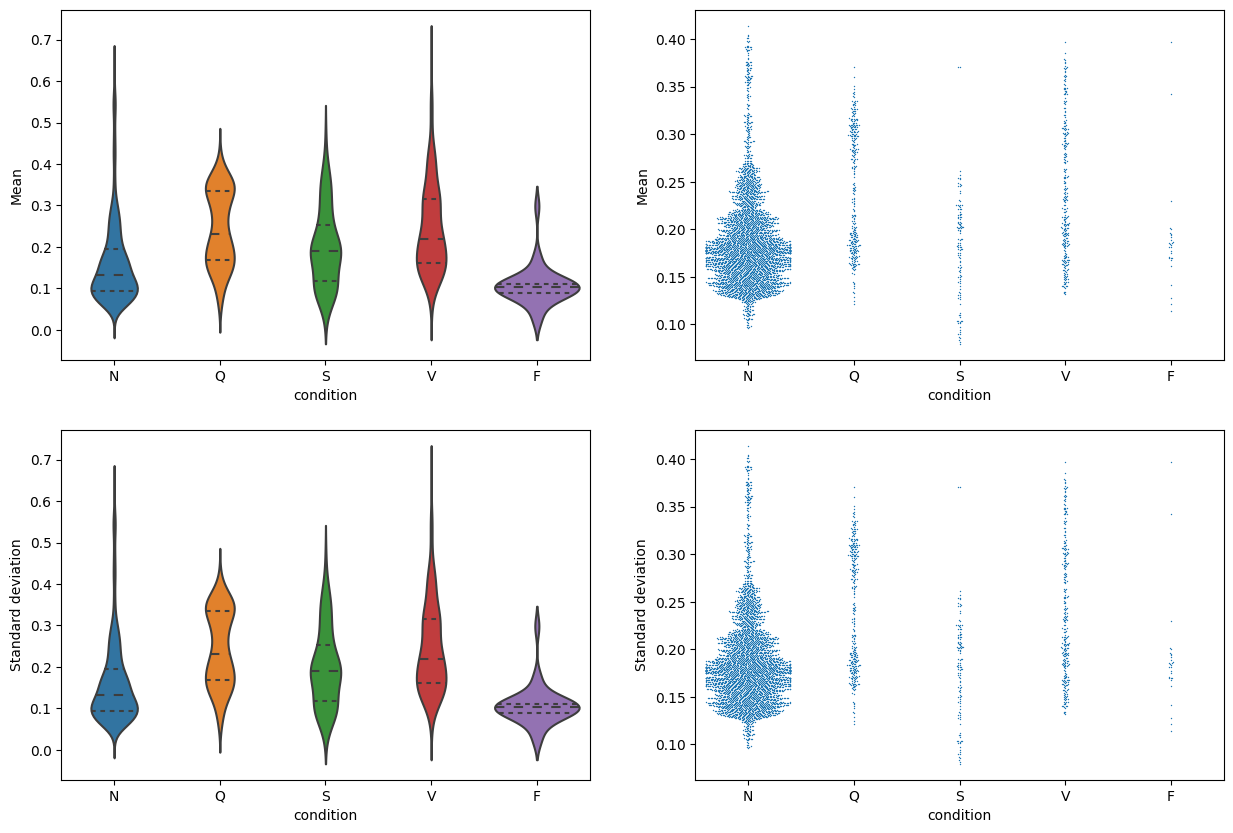

In [43]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
ax1,ax2,ax3,ax4=ax.ravel()
data=mean_std_df.sample(frac=0.05)
sns.violinplot(data=data,x='condition',y="mean"
    , ax =ax1,inner='quartile')
sns.swarmplot(data=data,x='condition',y="std"
    , ax =ax2,size=1)


sns.violinplot(data=data,x='condition',y="mean"
        , ax=ax3,inner='quartile')


sns.swarmplot(data=data,x='condition',y="std"
    ,ax=ax4,size=1)
ax1.set_ylabel("Mean")
ax2.set_ylabel("Mean")
ax3.set_ylabel("Standard deviation")
ax4.set_ylabel("Standard deviation")
plt.savefig('violinplot_and_swarmplot')

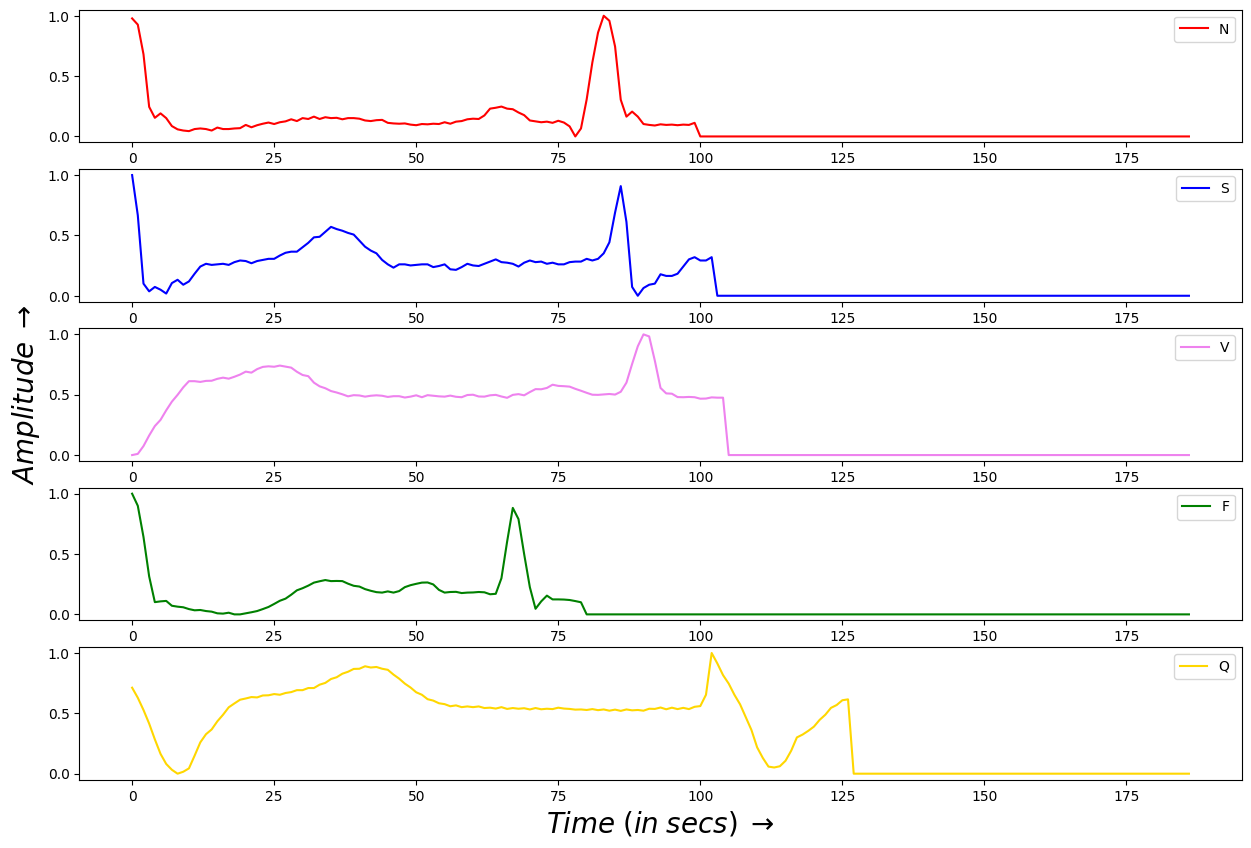

In [20]:
fig,ax=plt.subplots(5,1,figsize=(15,10))
ax1,ax2,ax3,ax4,ax5=ax.ravel()


ax1.plot(df.query("condition=='N'").iloc[0,:-2],color='red',label='N')
ax2.plot(df.query("condition=='S'").iloc[0,:-2],color='blue',label='S')
ax3.plot(df.query("condition=='V'").iloc[0,:-2],color='violet',label='V')
ax4.plot(df.query("condition=='F'").iloc[0,:-2],color='green',label='F')
ax5.plot(df.query("condition=='Q'").iloc[0,:-2],color='gold',label='Q')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()\

ax3.set_ylabel(r'$Amplitude \; \rightarrow$',fontsize=20)

for axe in ax.ravel():
    axe.set_xlabel(r'$Time \;(in \;secs)\;\rightarrow$',fontsize=20)
    
plt.savefig('Five_diseases.jpeg')

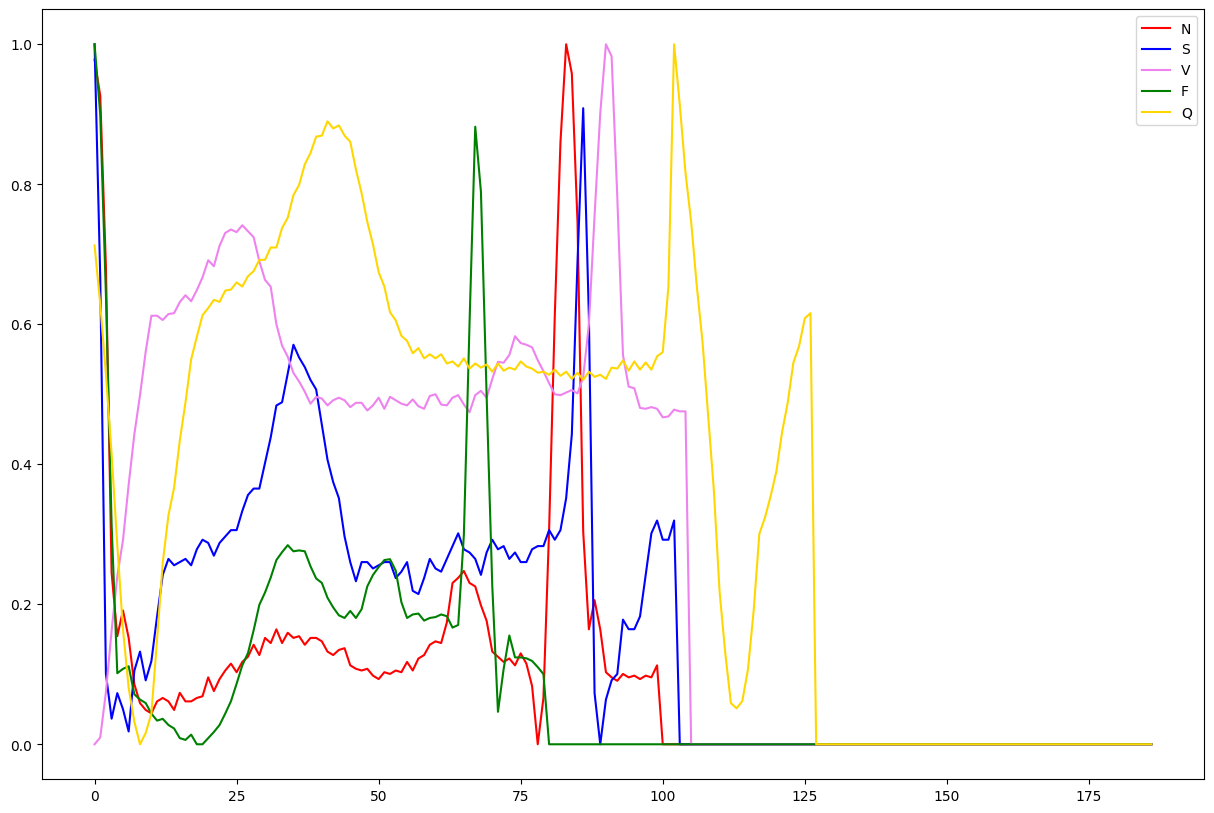

In [21]:
plt.figure(figsize=(15,10))

plt.plot(df.query("condition=='N'").iloc[0,:-2],color='red',label='N')
plt.plot(df.query("condition=='S'").iloc[0,:-2],color='blue',label='S')
plt.plot(df.query("condition=='V'").iloc[0,:-2],color='violet',label='V')
plt.plot(df.query("condition=='F'").iloc[0,:-2],color='green',label='F')
plt.plot(df.query("condition=='Q'").iloc[0,:-2],color='gold',label='Q')
plt.legend()

In [22]:
import scipy.signal

In [23]:
sample_ecg = df.loc[0][:-2].values

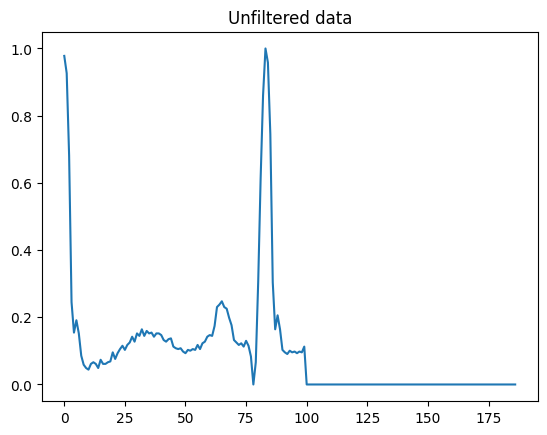

In [24]:
plt.plot(sample_ecg)
plt.title('Unfiltered data')
plt.savefig('unfiltered_data.jpeg')

In [25]:
sampling_freq = 200
b, a = scipy.signal.butter(3, 0.1)
filtered = scipy.signal.filtfilt(b, a, sample_ecg)


Text(0.5, 1.0, 'Filtered data')

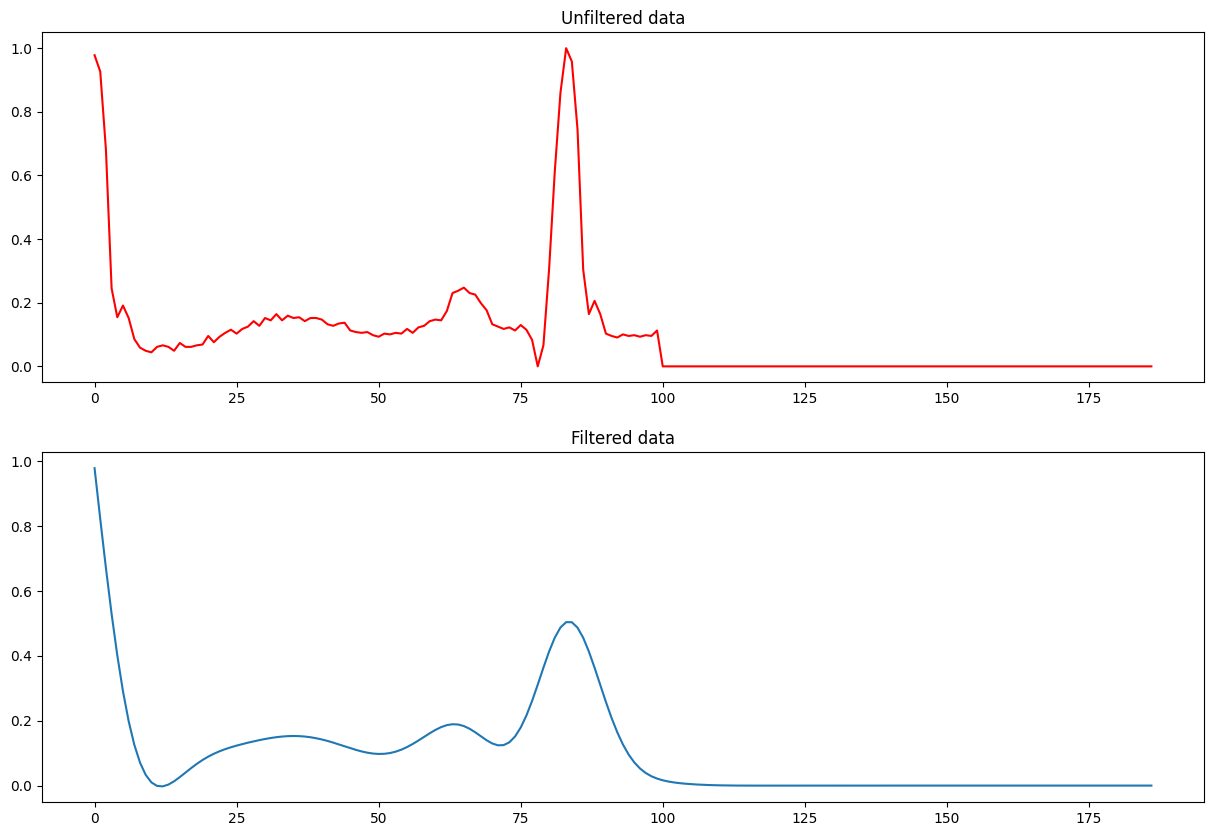

In [26]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
ax1,ax2=ax.ravel()
ax1.plot(sample_ecg,color='red')
ax2.plot(filtered)
ax1.set_title('Unfiltered data')
ax2.set_title('Filtered data')


We use different cut off frequencies to predict which frequency fits best.

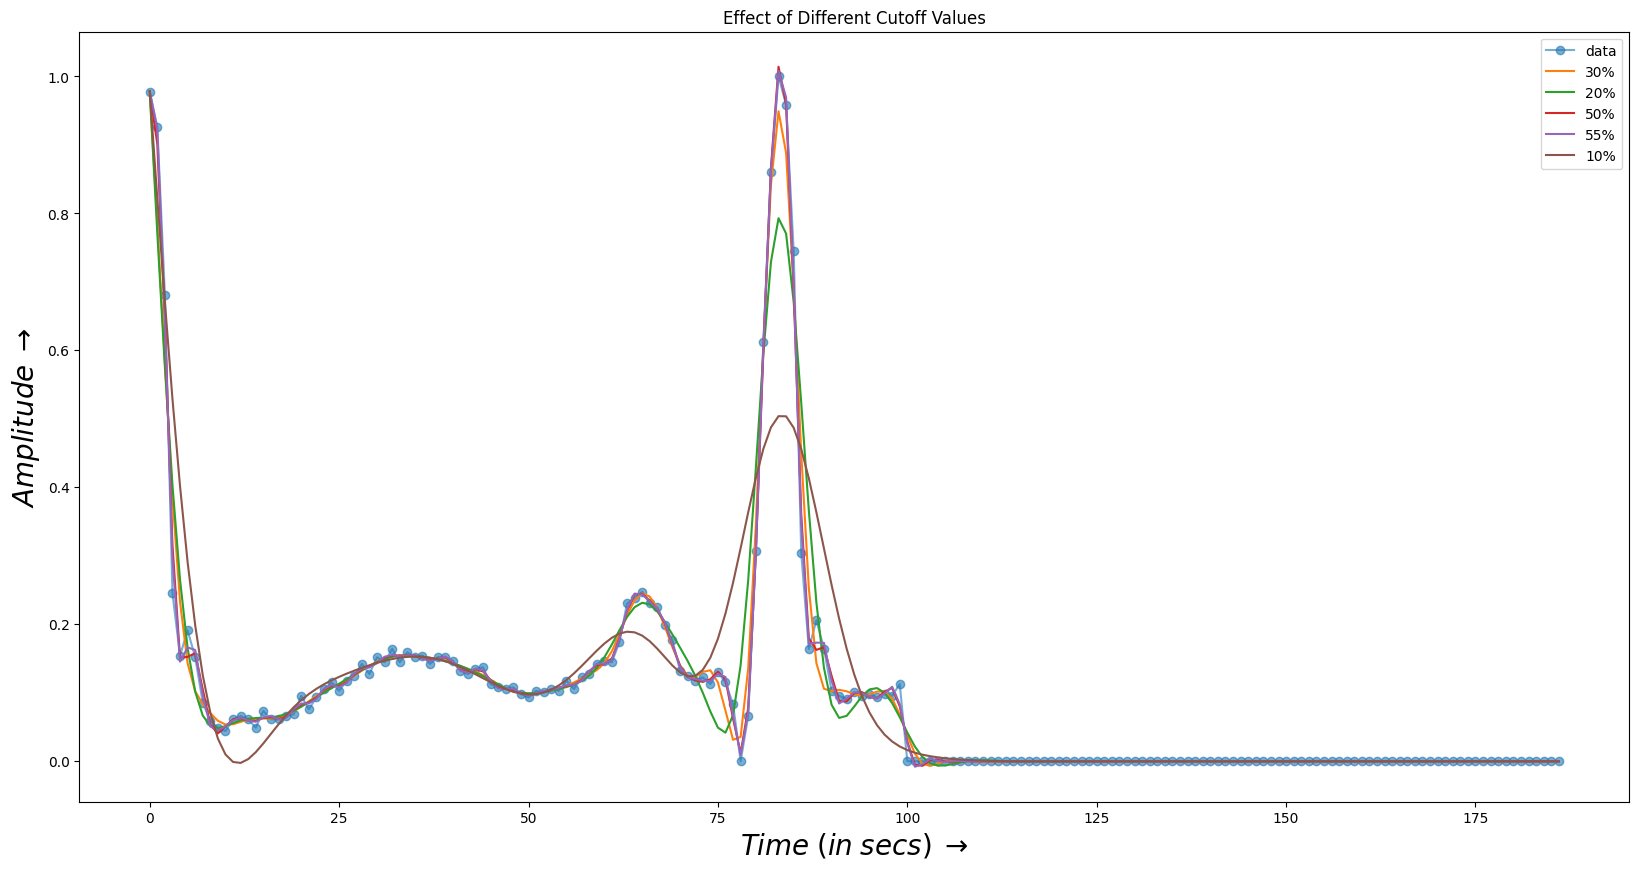

In [27]:
plt.figure(figsize=(20,10))
plt.plot(sample_ecg,'o-',alpha=0.6,label='data')

for cutoff in [0.3,0.2,0.5,0.55,0.1]:
    b,a=scipy.signal.butter(3,cutoff)
    filtered=scipy.signal.filtfilt(b,a,sample_ecg)
    label=f"{int(cutoff*100):d}%"
    plt.plot(filtered,label=label)
plt.legend()
plt.xlabel(r'$Time \;(in \;secs)\;\rightarrow$',fontsize=20)
plt.ylabel(r'$Amplitude \; \rightarrow$',fontsize=20)
plt.title("Effect of Different Cutoff Values")
plt.savefig('Effect_of_Different_Cutoff_Values.jpeg')


We see that the cut off frequency value 0.55 is suiting the best in accordance with the data points.

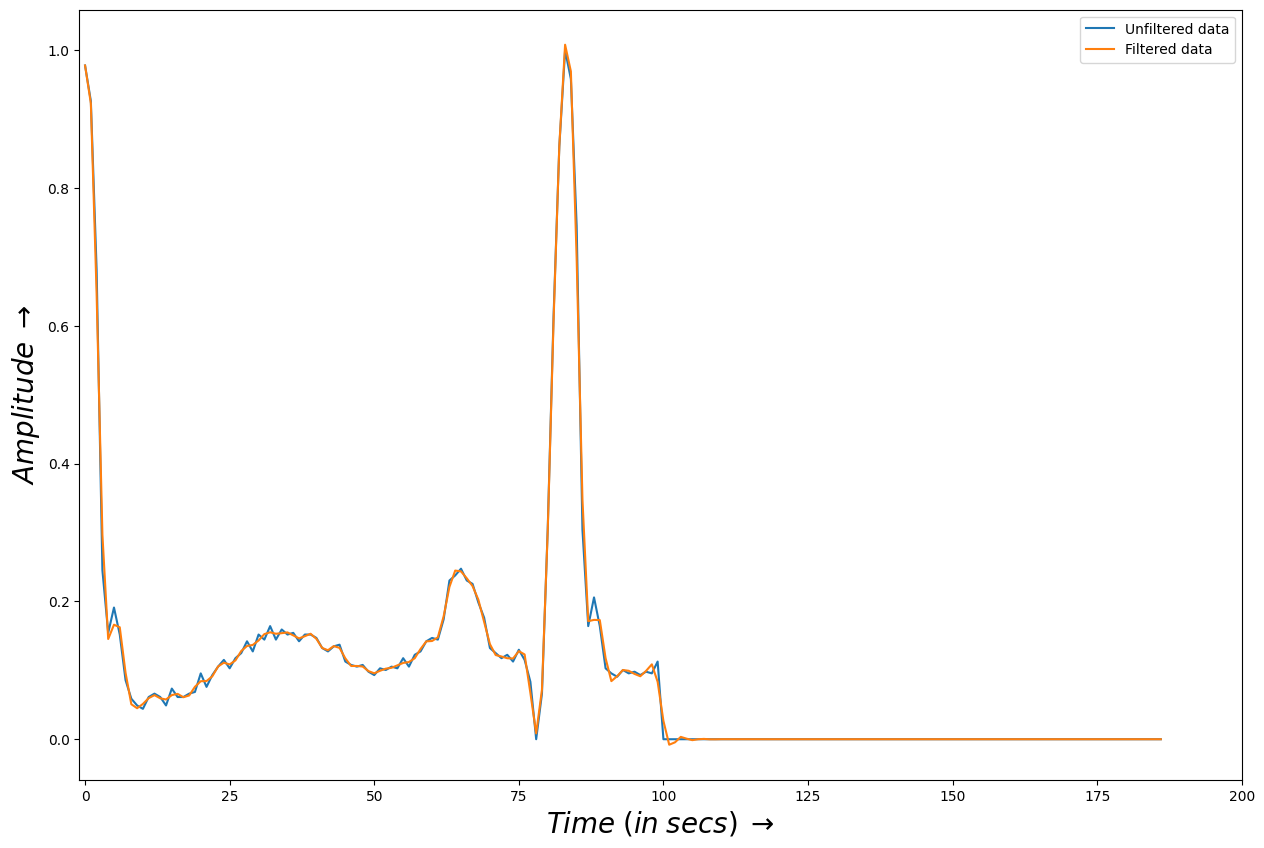

In [28]:
plt.figure(figsize=(15,10))
b,a=scipy.signal.butter(3,0.55)
filtered=scipy.signal.filtfilt(b,a,sample_ecg)

plt.plot(sample_ecg,label='Unfiltered data')
plt.plot(filtered,label='Filtered data')
plt.legend()
plt.axis([-1,200,None,None])
plt.xlabel(r'$Time \;(in \;secs)\;\rightarrow$',fontsize=20)
plt.ylabel(r'$Amplitude \; \rightarrow$',fontsize=20)
plt.savefig('Filtered using Butterworth Filter')

We have to work on improving the edges using gustaffson's method. Padding is not used as the existence of any stray points will affect the curve and give us wrong results. Padding is where the edge data points are smoothened by duplicatig them. The advantage of the gustafsson's method is it does not get influenced by the stray points as such.

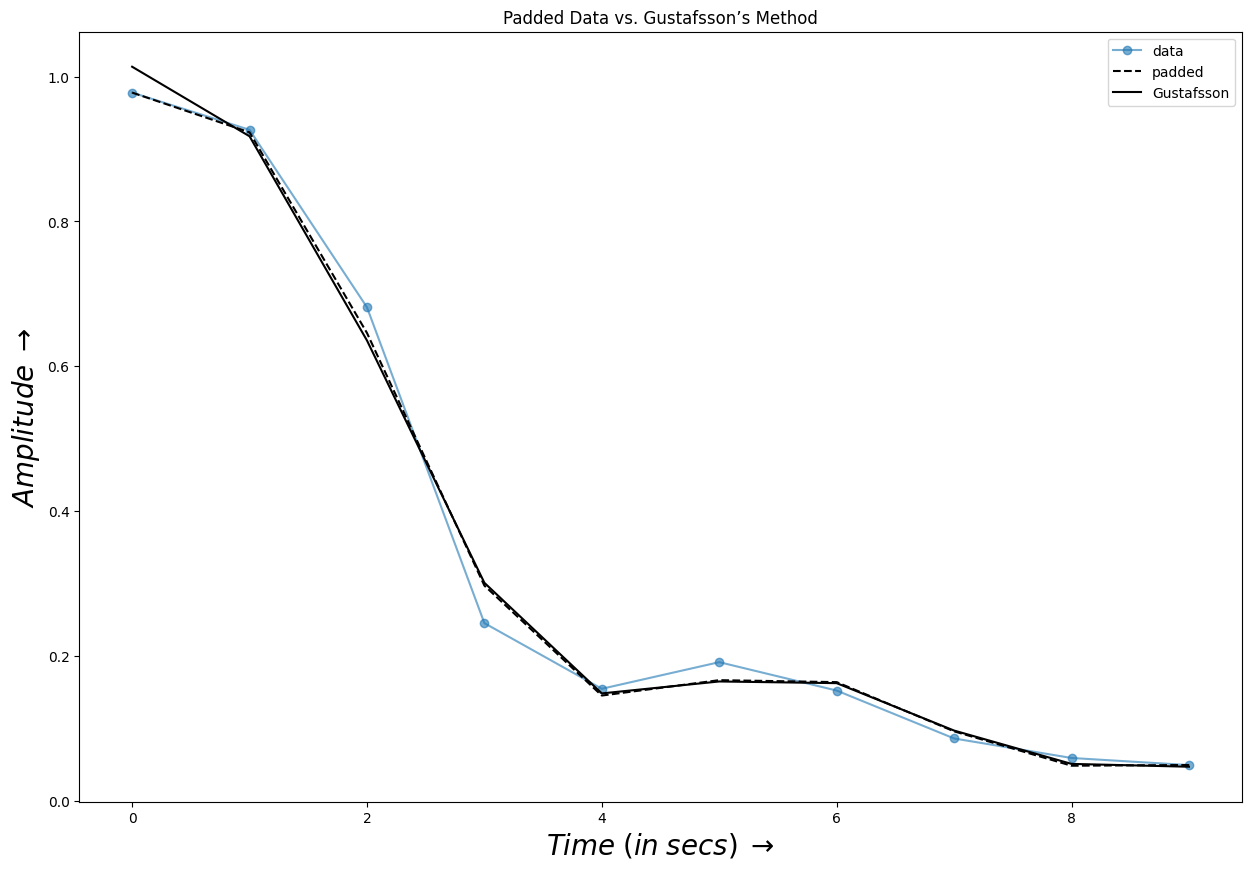

In [29]:
plt.figure(figsize=(15,10))
segment = sample_ecg[0:10].astype(np.float32)

filtered = scipy.signal.filtfilt(b, a, segment,padlen=9)
filteredGust = scipy.signal.filtfilt(b, a, segment, method="gust")

plt.plot(segment, 'o-', alpha=0.6, label="data")
plt.plot(filtered, 'k--', label="padded")
plt.plot(filteredGust, 'k', label="Gustafsson")
plt.legend()
plt.title("Padded Data vs. Gustafsson’s Method")
plt.xlabel(r'$Time \;(in \;secs)\;\rightarrow$',fontsize=20)
plt.ylabel(r'$Amplitude \; \rightarrow$',fontsize=20)
plt.savefig('gustafsson')


In [30]:
ds=df.drop(["condition",187],axis='columns')



In [31]:
ds[0:10].astype(np.float32)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def filter(x:pd.DataFrame):
    b,a=scipy.signal.butter(3,0.55,btype='low',output='ba')
    filtered=scipy.signal.filtfilt(b,a,x)
    return filtered


In [33]:
data=pd.DataFrame(filter(ds))



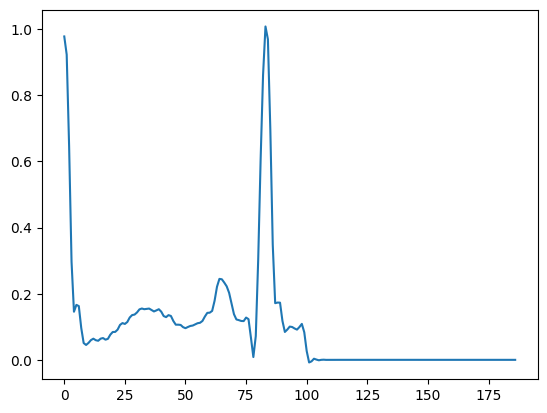

In [34]:
plt.plot(data.loc[0])

Text(0.5, 0, 'Unfiltered data')

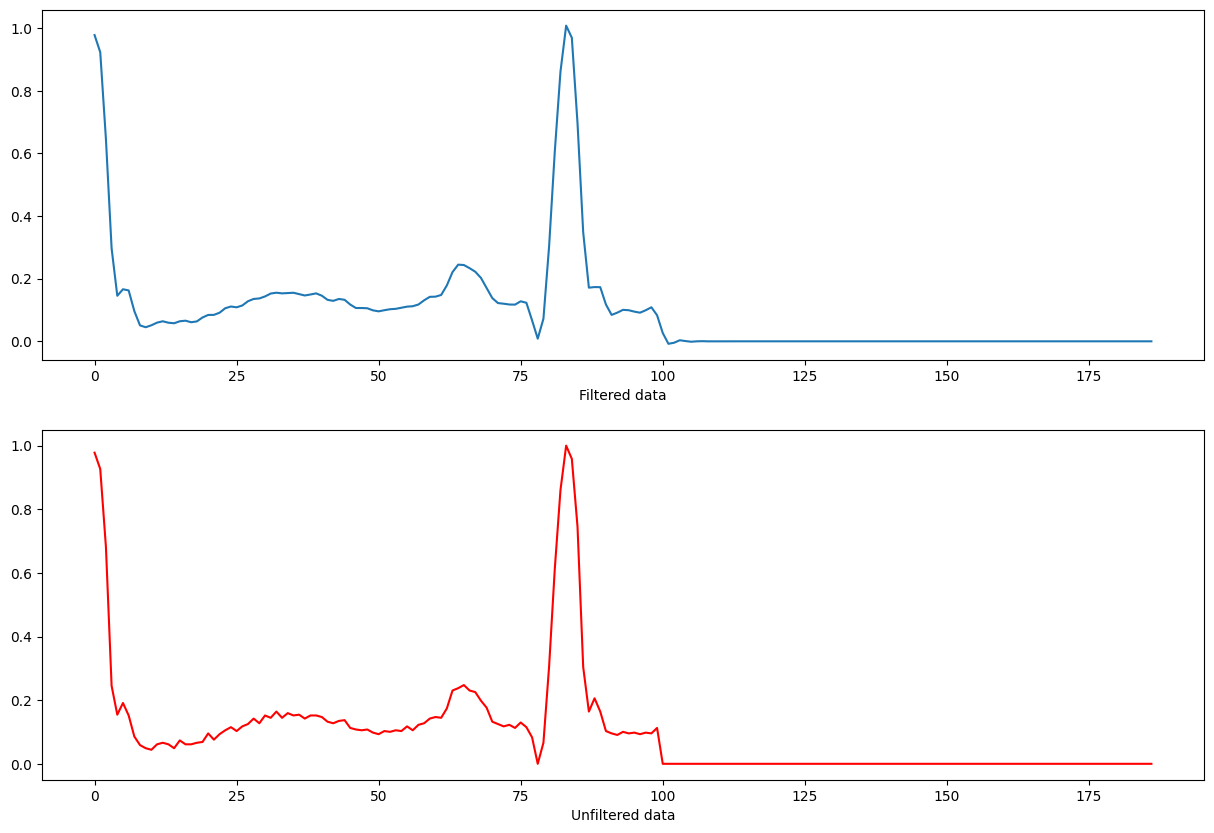

In [35]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
ax1,ax2=ax.ravel()

ax1.plot(data.loc[0])
ax2.plot(ds.loc[0],color='red')

ax1.set_xlabel('Filtered data')
ax2.set_xlabel('Unfiltered data')

In [36]:
def gustaffson(data):
    

    b,a=scipy.signal.butter(3,0.55)
    filtered = scipy.signal.filtfilt(b, a, data, method="gust")
    return filtered
    

In [37]:
data.iloc[:,:10]=np.vstack(data.iloc[:,:10].apply(func=gustaffson,axis=1))

Text(0.5, 1.0, 'Filtered Signal')

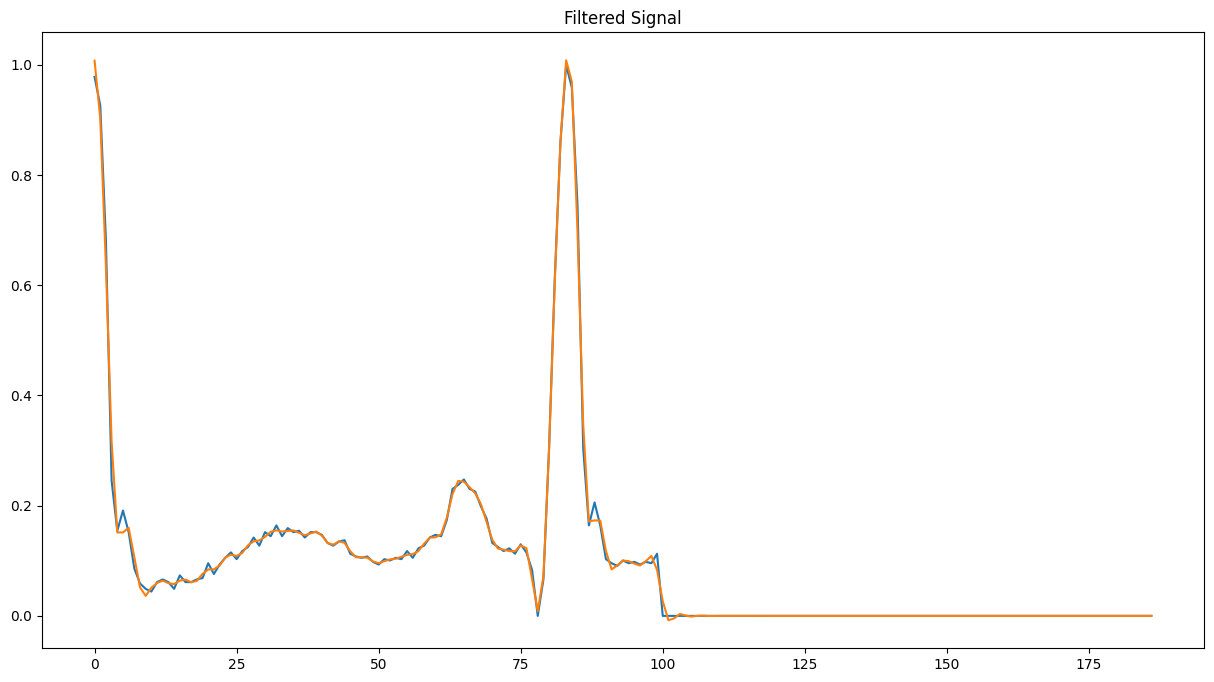

In [38]:
plt.figure(figsize=(15,8))

plt.plot(df.drop(["condition",187],axis='columns').loc[0])
plt.title('Unfiltered Signal')
plt.plot(data.loc[0])
plt.title('Filtered Signal')

Extracting features which do not require sample frequency.


abs_energy(signal) 	
zero_cross(signal) 	
autocorr(signal)      
calc_max(signal) 	    
calc_mean(signal) 	
calc_median(signal) 	
calc_min(signal) 	   
calc_std(signal) 	    
calc_var(signal) 	
distance(signal)	    
interq_range(signal) 
kurtosis(signal) 	
pk_pk_distance(signal) 	
positive_turning(signal) 	
skewness(signal) 	
slope(signal) 	    
sum_abs_diff(signal)

In [39]:
# Import all the features
from tsfel.feature_extraction.features import *
import tsfel

In [50]:
# Mathematical features without any sampling frequency
feature_df = pd.DataFrame()
feature_df["Condition"] = df["condition"]
features = [
    tsfel.abs_energy, 
    tsfel.autocorr,
    tsfel.calc_mean,
    tsfel.calc_std,
    tsfel,calc_median,
    tsfel.entropy,
    tsfel.kurtosis,
    tsfel.mean_abs_deviation,
    tsfel.negative_turning,
    tsfel.positive_turning,
    tsfel.skewness,
    tsfel.zero_cross
]

for idx, func in enumerate(features):
    print(f"Func {idx} / {len(features)} = {func.__name__} Done")
    try:
        feature_df[func.__name__] = df.drop(["condition",187],axis='columns').apply(func,axis=1)
    except Exception as e:
        print(e)
        print(f"Error in {func.__name__}")
        continue

Func 0 / 13 = abs_energy Done
Func 1 / 13 = autocorr Done
Func 2 / 13 = calc_mean Done
Func 3 / 13 = calc_std Done
Func 4 / 13 = tsfel Done

Error in tsfel
Func 5 / 13 = calc_median Done
Func 6 / 13 = entropy Done
Func 7 / 13 = kurtosis Done
Func 8 / 13 = mean_abs_deviation Done
Func 9 / 13 = negative_turning Done
Func 10 / 13 = positive_turning Done
Func 11 / 13 = skewness Done
Func 12 / 13 = zero_cross Done


In [51]:
feature_df.columns

Index(['Condition', 'abs_energy', 'autocorr', 'calc_mean', 'calc_std',
       'calc_median', 'entropy', 'kurtosis', 'mean_abs_deviation',
       'negative_turning', 'positive_turning', 'skewness', 'zero_cross'],
      dtype='object')

In [52]:
feature_df.to_csv("features.csv",index=False)

In [57]:
feature_df = pd.read_csv("features.csv")
feature_df.head(2)

,Condition,abs_energy,autocorr,calc_mean,calc_std,calc_median,entropy,kurtosis,mean_abs_deviation,negative_turning,positive_turning,skewness,zero_cross
0,N,7.608654,7.608654,0.098419,0.176073,0.061275,0.521825,13.625459,0.098821,25,25,3.546201,3
1,N,6.285631,6.285631,0.090010,0.159722,0.054131,0.664552,16.261444,0.085626,27,27,3.835006,5


<AxesSubplot: ylabel='Frequency'>

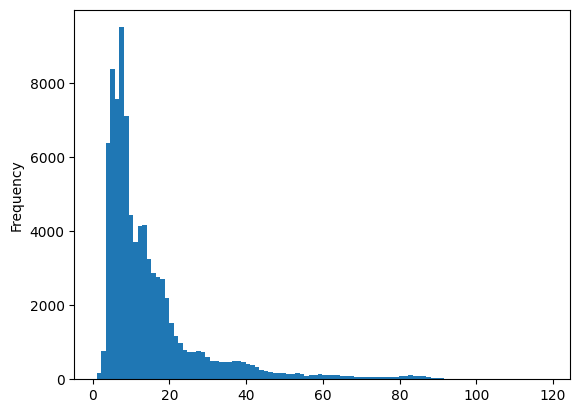

In [54]:
feature_df['abs_energy'].plot(kind='hist',bins=100)


In [73]:
feature_df.columns
columns=feature_df.columns[1:]


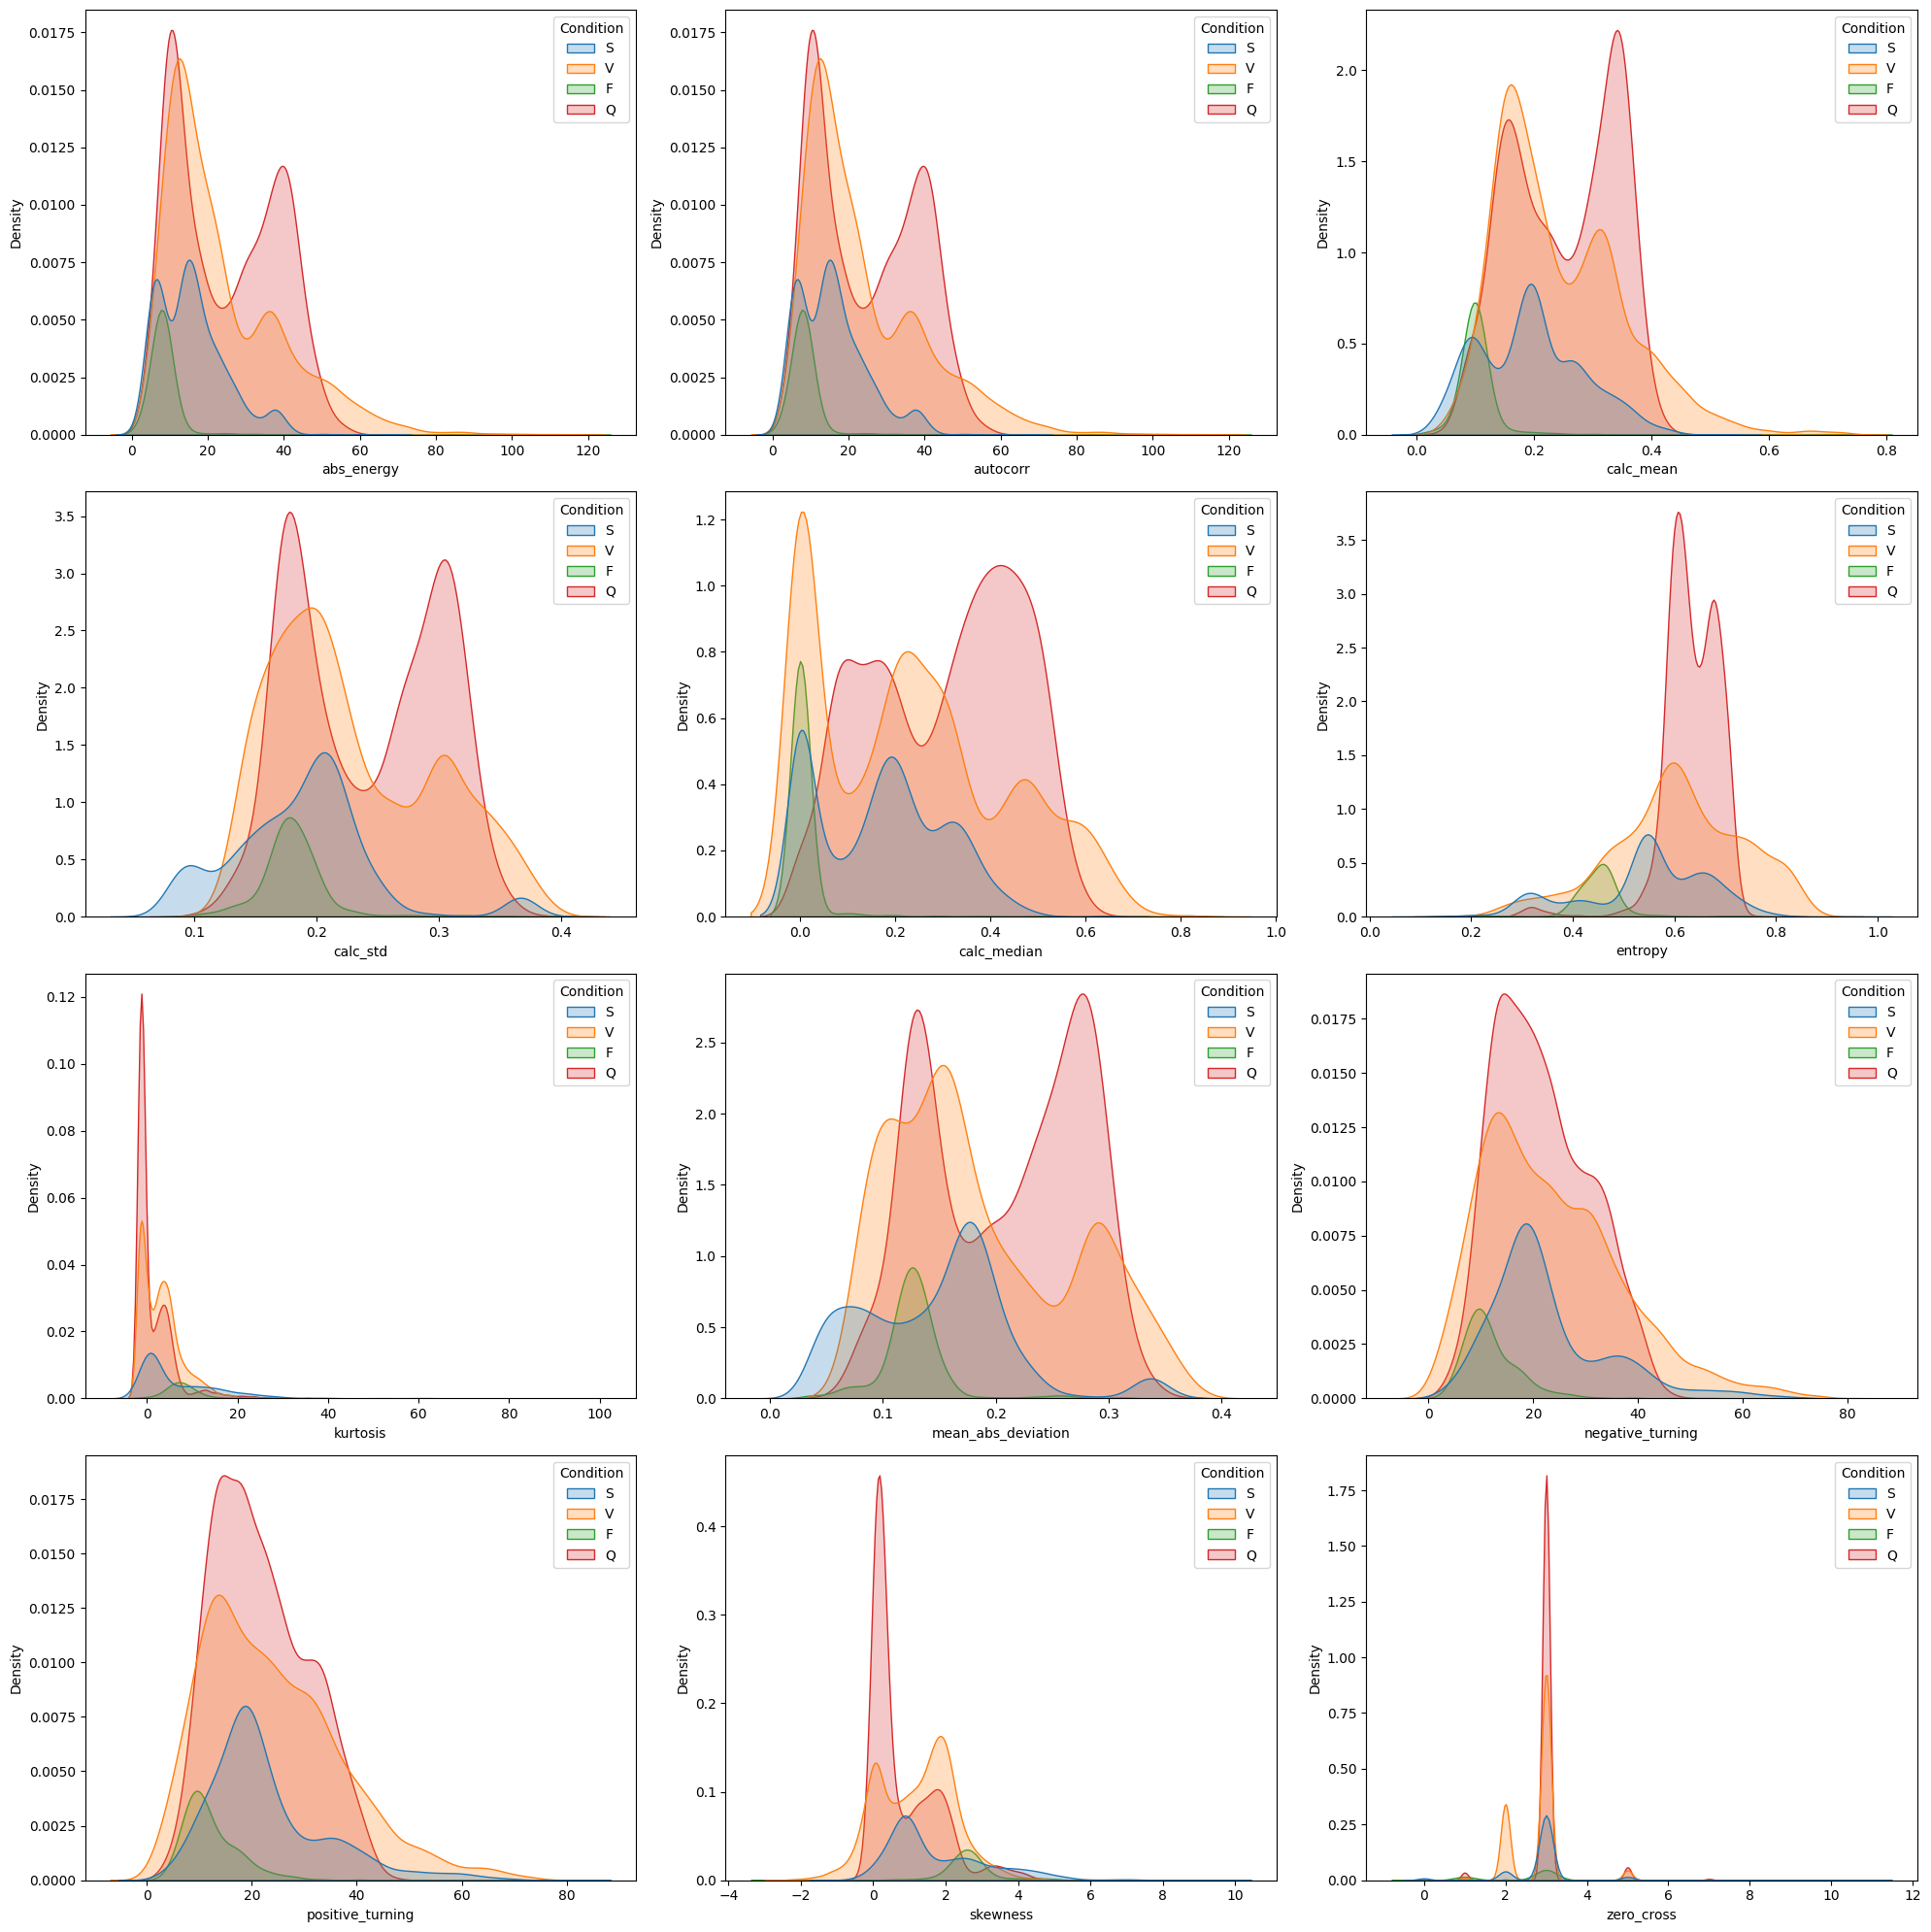

In [90]:

fig, axs = plt.subplots(4, 3, figsize=(20, 20))
axs=axs.ravel()
for i, col in enumerate(columns):
    sns.kdeplot(data=feature_df.query("Condition != 'N'"),x=col,hue='Condition',ax=axs[i],fill=True)
plt.tight_layout()